In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Physical parameters

In [2]:
delay=239.6e-9
tau_L = 1 / (12.5e9*2*np.pi)
tau_H = 1/ (0.625e6*2*np.pi)
beta = 1
kappa = 0.9
phi_0 = -0.25*np.pi
parameters = [tau_L,tau_H,beta,kappa,phi_0]

### Simulation parameters

In [3]:
deltat = 1e-11
T = 1e-5
ntau = int(np.floor(delay/deltat))
nT = int(np.floor(T/deltat))

### Initialize state vectors with initial conditions

In [4]:
# Initialise state vectors
Xp = np.zeros(nT+3)
Xc = np.zeros(nT+3)
Y = np.zeros(nT)

# Initial conditions
Xp[0:ntau+3] = 0.01 * np.random.normal(loc=0.0, scale=1.0, size=(ntau+3))
Xc[0:ntau+3] = 0.01 * np.random.normal(loc=0.0, scale=1.0, size=(ntau+3))
Y[0:ntau] = 0.01 * np.random.normal(loc=0.0, scale=1.0, size=(ntau))

In [5]:
def fnlx(x,y,xtau,parameters):
    tau_L = parameters[0]
    tau_H = parameters[1]
    beta = parameters[2]
    kappa = parameters[3]
    phi_0 = parameters[4]
    return -(1/tau_L+1/tau_H)*x - y/tau_L + beta/tau_L*(np.cos(kappa*xtau+phi_0))**2

def fnly(x,parameters):
    tau_H = parameters[1]
    return 1/tau_H*x

for n in range(ntau+3,nT-1):
    
    Xp[n+1] = Xc[n] + deltat/24*(55*fnlx(Xc[n],Y[n],Xc[n-ntau],parameters)-59*fnlx(Xc[n-1],Y[n-1],Xc[n-ntau-1],parameters)+37*fnlx(Xc[n-2],Y[n-2],Xc[n-ntau-2],parameters)-9*fnlx(Xc[n-3],Y[n-3],Xc[n-ntau-3],parameters))
    Y[n+1] = Y[n] + deltat*fnly(Xc[n],parameters)
    Xc[n+1] = Xc[n] + deltat/24*(9*fnlx(Xp[n+1],Y[n+1],Xc[n-ntau+1],parameters)+19*fnlx(Xc[n],Y[n],Xc[n-ntau],parameters)-5*fnlx(Xc[n-1],Y[n-1],Xc[n-ntau-1],parameters)+fnlx(Xc[n-2],Y[n-2],Xc[n-ntau-2],parameters))

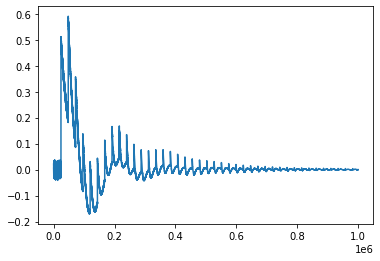

In [6]:
plt.plot(Xc)

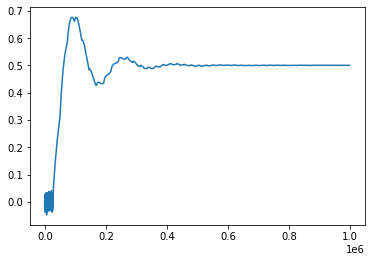

In [7]:
plt.plot(Y)

In [8]:
Xci = Xc[-ntau-3:]
Xpi = Xp[-ntau-3:]
Yi = Y[-ntau:]

In [9]:
# Initialise state vectors
Xp = np.zeros(nT+3)
Xc = np.zeros(nT+3)
Y = np.zeros(nT)

# Initial conditions
Xp[0:ntau+3] = Xci
Xc[0:ntau+3] = Xpi
Y[0:ntau] = Yi

In [10]:
for n in range(ntau+3,nT-1):
    
    Xp[n+1] = Xc[n] + deltat/24*(55*fnlx(Xc[n],Y[n],Xc[n-ntau],parameters)-59*fnlx(Xc[n-1],Y[n-1],Xc[n-ntau-1],parameters)+37*fnlx(Xc[n-2],Y[n-2],Xc[n-ntau-2],parameters)-9*fnlx(Xc[n-3],Y[n-3],Xc[n-ntau-3],parameters))
    Y[n+1] = Y[n] + deltat*fnly(Xc[n],parameters)
    Xc[n+1] = Xc[n] + deltat/24*(9*fnlx(Xp[n+1],Y[n+1],Xc[n-ntau+1],parameters)+19*fnlx(Xc[n],Y[n],Xc[n-ntau],parameters)-5*fnlx(Xc[n-1],Y[n-1],Xc[n-ntau-1],parameters)+fnlx(Xc[n-2],Y[n-2],Xc[n-ntau-2],parameters))

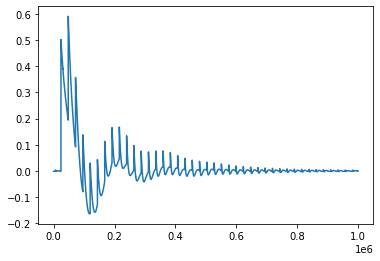

In [11]:
plt.plot(Xc)

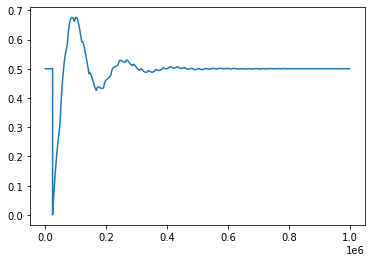

In [12]:
plt.plot(Y)